## boston 주택가격 예측모델(회귀)


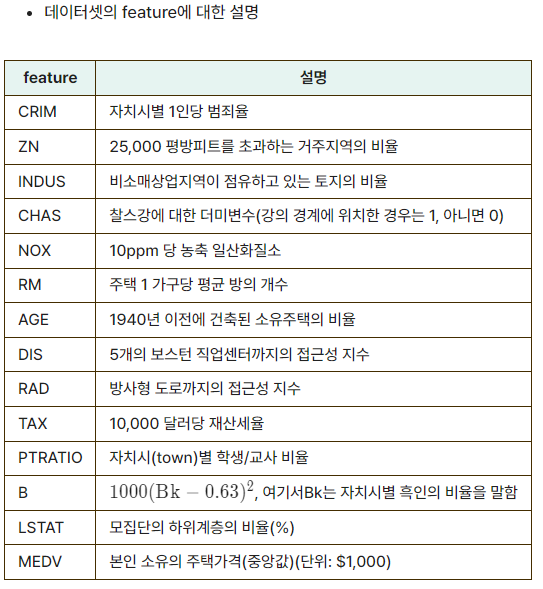

In [1]:
#라이브러리불러오기
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
#데이터셋 전처리(표준화작업)
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data=train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std=train_data.std(axis=0)
train_data=train_data /std
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean

test_data = test_data/std

In [5]:
#모델구성및 컴파일
# from sklearn.model_selection import train_test_split 
# # (x_train, y_train) = train_data
# # (x_test,y_test) = test_data
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
#                                                   test_size=0.3,
#                                                   random_state=123)
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
#회귀문제에서 mse를 손실함수로 mae를 평가지표로 사용하는이유
# 회귀 문제에서 손실 함수로 mse (Mean Squared Error, 평균 제곱 오차)를, 평가 지표로 mae (Mean Absolute Error, 평균 절대 오차)를 사용하는 것은 일반적인 선택입니다.

# mse는 예측 오차의 제곱의 평균을 계산합니다. 이는 모델이 실제 값과 크게 벗어난 예측을 할 경우, 그 오차가 제곱되어 손실에 더 큰 영향을 미치게 합니다. 따라서 mse는 이상치에 민감하게 반응하는 특성이 있습니다. 이런 특성은 모델 학습 시에는 유용하게 작용하여, 큰 오차를 더 빠르게 줄여나가는 경향이 있습니다.

# 반면, mae는 예측 오차의 절대값의 평균을 계산합니다. 이는 오차의 크기에 상관없이 모든 오차를 동일하게 취급합니다. 따라서 mae는 모델의 성능을 인간이 이해하기 쉬운 방식으로 해석하는 데 유용합니다.

# 물론, mse를 평가 지표로 사용하는 것도 가능합니다. 그러나 mse는 오차를 제곱하기 때문에, 오차의 실제 크기보다 크게 나타날 수 있습니다. 이는 인간이 모델 성능을 해석하는 데 어려움을 줄 수 있습니다.

# 따라서, 일반적으로는 mse를 손실 함수로 사용하여 모델을 학습시키고, mae를 평가 지표로 사용하여 모델 성능을 해석하는 것이 효과적입니다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
#모델학습
history = model.fit(train_data,train_labels,
                    epochs=40,
                    batch_size=32,validation_split=0.2)
                   

Epoch 1/40
11/11 [==============================] - 1s 15ms/step - loss: 557.3292 - mae: 21.7205 - val_loss: 596.3723 - val_mae: 22.6553
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 508.2838 - mae: 20.6141 - val_loss: 542.0971 - val_mae: 21.4595
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 450.1086 - mae: 19.2393 - val_loss: 471.8719 - val_mae: 19.8241
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 375.8613 - mae: 17.3285 - val_loss: 381.1827 - val_mae: 17.5478
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 285.0124 - mae: 14.6782 - val_loss: 280.0448 - val_mae: 14.5308
Epoch 6/40
11/11 [==============================] - 0s 4ms/step - loss: 188.4465 - mae: 11.5099 - val_loss: 183.9164 - val_mae: 10.9701
Epoch 7/40
11/11 [==============================] - 0s 4ms/step - loss: 113.5539 - mae: 8.3653 - val_loss: 118.8617 - val_mae: 8.2257
Epoch 8/40
11/11 [==============================]

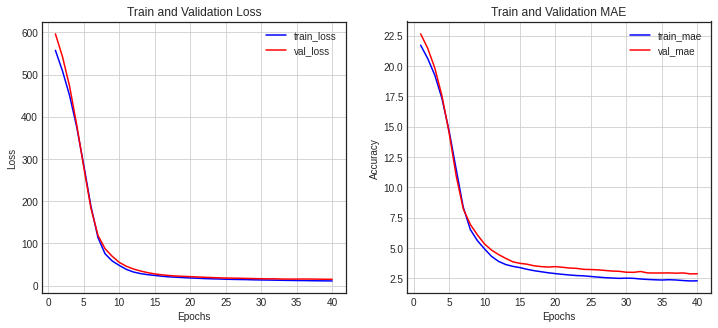

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
#모델평가및 예측
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 23.4816 - mae: 3.3039


[23.481569290161133, 3.3039443492889404]